(64814, 8)
   YEAR  ID_  AGE  EDUC  SEX  GUNLAW  GRASS  REALINC
0  1972    1   23    16    2       1      0  18951.0
1  1972    2   70    10    1       1      0  24366.0
2  1972    3   48    12    2       1      0  24366.0
3  1972    4   27    17    2       1      0  30458.0
4  1972    5   61    12    2       1      0  50763.0
0       165
1        47
2       152
3       257
4       319
5       402
6       828
7       879
8      2724
9      2083
10     2880
11     3743
12    19663
13     5360
14     7160
15     2910
16     8355
17     1967
18     2384
19      920
20     1439
98       73
99      104
Name: EDUC, dtype: int64


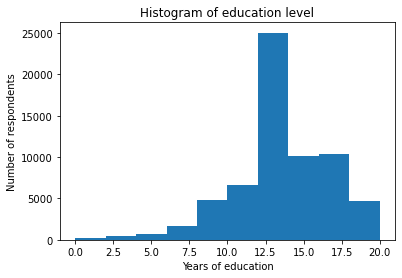

<class 'empiricaldist.empiricaldist.Pmf'>
0.0    165
1.0     47
2.0    152
Name: , dtype: int64
18.0    2384
19.0     920
20.0    1439
Name: , dtype: int64
1439
0.0    0.002553
1.0    0.000727
2.0    0.002352
Name: , dtype: float64
0.30420656899299164


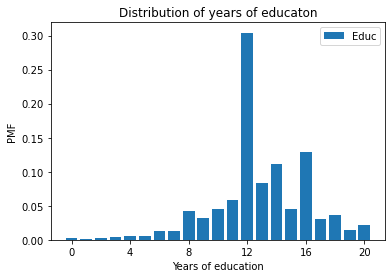

In [1]:
import empiricaldist
from statadict import parse_stata_dict

dict_file = 'GSS.dct'
data_file = 'GSS.dat.gz'

from statadict import parse_stata_dict
stata_dict = parse_stata_dict(dict_file)

import gzip
fp = gzip.open(data_file)

#Covnvert the file into a Pandas DataFrame

import pandas as pd
gss = pd.read_fwf(fp, names = stata_dict.names, colspecs=stata_dict.colspecs)

print(gss.shape)
print(gss.head())

#Distribution of education
print(gss['EDUC'].value_counts().sort_index())

#The values 98 and 99 are special codes for "Don't know" and "NO answer". 
#We'll use replace these codes with NaN.

import numpy as np
educ = gss['EDUC'].replace([98,99],np.nan)

#Visualize it
import matplotlib.pyplot as plt

educ.hist(grid=False)
plt.xlabel('Years of education')
plt.ylabel('Number of respondents')
plt.title('Histogram of education level')
plt.show()

#Looks like the peak is near 12 years of education. But a histogram is not the 
#best way to visulize this

from empiricaldist import Pmf

pmf_educ = Pmf.from_seq(educ, normalize=False)
print(type(pmf_educ))
print(pmf_educ.head())
print(pmf_educ.tail())
print(pmf_educ[20])

#Usually when we make a PMF, we want to know the fraction of 


pmf_educ_norm = Pmf.from_seq(educ, normalize=True)
print(pmf_educ_norm.head())
print(pmf_educ_norm[12]) #Sample for 12 years of experience

#Pmf provides a bar method that plots the values and their probablities as a bar chart
pmf_educ_norm.bar(label="Educ")

plt.xlabel('Years of education')
plt.xticks(range(0,21,4))
plt.ylabel("PMF")
plt.title("Distribution of years of educaton")
plt.legend()
plt.show()